In [18]:
%pip install pandas matplotlib seaborn numpy scikit-learn

  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.15.2-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.15.2-cp311-cp311-win_amd64.whl (41.2 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [5]:
column_names = ["id", "unique_id", "category", "country", "text", "label"]
df = pd.read_csv("dontpatronizeme_pcl.tsv", sep="\t", skiprows=4, header=None, names=column_names)


In [6]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   id   unique_id   category country  \
0   1  @@24942188   hopeless      ph   
1   2  @@21968160    migrant      gh   
2   3  @@16584954  immigrant      ie   
3   4   @@7811231   disabled      nz   
4   5   @@1494111    refugee      ca   

                                                text  label  
0  We 're living in times of absolute insanity , ...      0  
1  In Libya today , there are countless number of...      0  
2  White House press secretary Sean Spicer said t...      0  
3  Council customers only signs would be displaye...      0  
4  " Just like we received migrants fleeing El Sa...      0  


In [7]:
# 2. Label Distribution
label_counts = df['label'].value_counts()
print("\nLabel Distribution:")
print(label_counts)



Label Distribution:
label
0    8529
1     947
3     458
4     391
2     144
Name: count, dtype: int64


C:\Users\emanu\AppData\Local\Temp\ipykernel_37192\3536312157.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette="viridis")


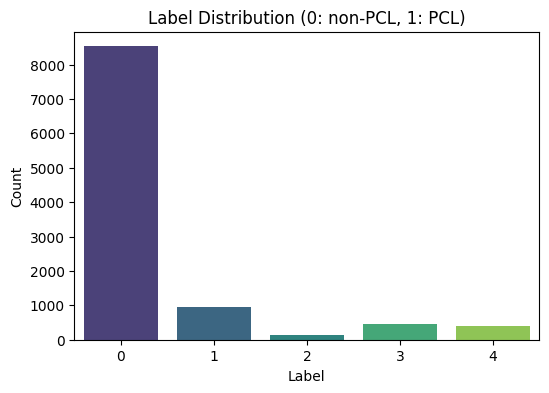

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette="viridis")
plt.title("Label Distribution (0: non-PCL, 1: PCL)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


Text Length Statistics:
count    10469.000000
mean        48.422581
std         29.091174
min          1.000000
25%         30.000000
50%         42.000000
75%         60.000000
max        909.000000
Name: text_length, dtype: float64


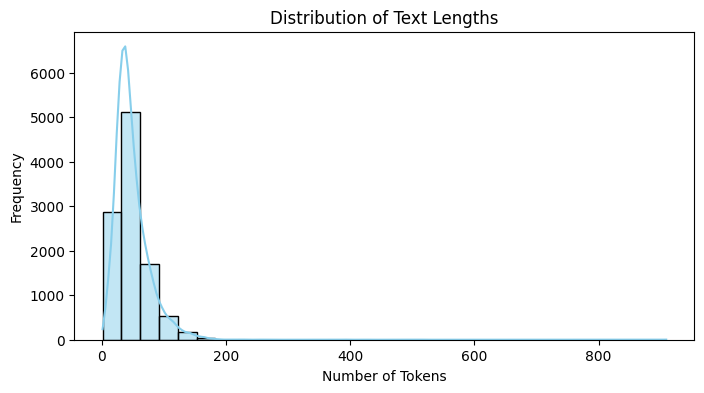

C:\Users\emanu\AppData\Local\Temp\ipykernel_37192\14964197.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='text_length', data=df, palette="Set2")


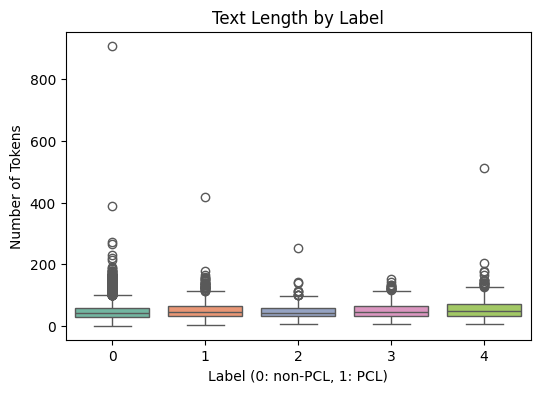

In [ ]:
#################################
# Analysis of Text Length (using string conversion)
#################################
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))
print("\nText Length Statistics:")
print(df['text_length'].describe())

plt.figure(figsize=(8,4))
sns.histplot(df['text_length'], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Text Lengths")
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='label', y='text_length', data=df, palette="Set2")
plt.title("Text Length by Label")
plt.xlabel("Label (0: non-PCL, 1: PCL)")
plt.ylabel("Number of Tokens")
plt.show()

C:\Users\emanu\AppData\Local\Temp\ipykernel_37192\43506266.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='category', data=df, order=df['category'].value_counts().index, palette="viridis")


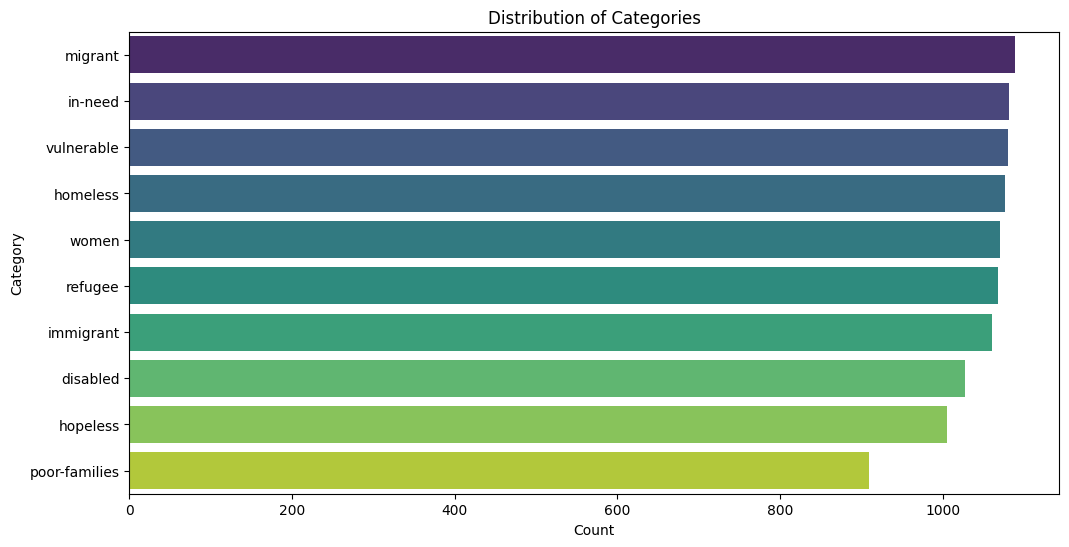


Average Label (PCL proportion) by Category:
        category     label
0       disabled  0.329767
1       homeless  0.685237
2       hopeless  0.535323
3      immigrant  0.127238
4        in-need  0.646026
5        migrant  0.158861
6  poor-families  0.669967
7        refugee  0.335206
8     vulnerable  0.316667
9          women  0.226168


C:\Users\emanu\AppData\Local\Temp\ipykernel_37192\43506266.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='label', y='category', data=category_label, order=category_label.sort_values('label', ascending=False)['category'], palette="coolwarm")


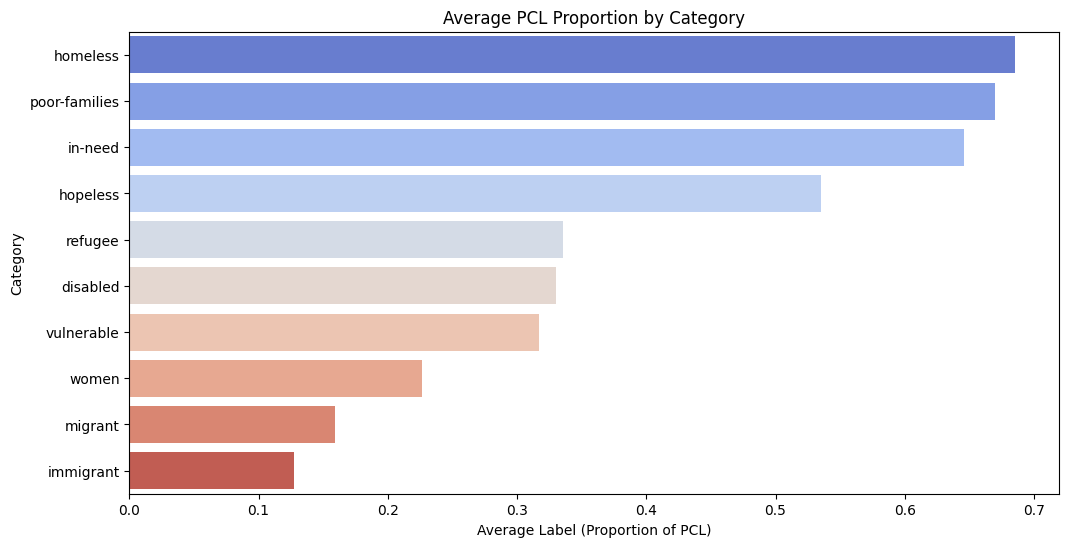

In [ ]:
#################################
#Analysis of Category Distribution
#################################
plt.figure(figsize=(12,6))
sns.countplot(y='category', data=df, order=df['category'].value_counts().index, palette="viridis")
plt.title("Distribution of Categories")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

# Relationship between category and label (calculate average label per category)
category_label = df.groupby('category')['label'].mean().reset_index()
print("\nAverage Label (PCL proportion) by Category:")
print(category_label)

plt.figure(figsize=(12,6))
sns.barplot(x='label', y='category', data=category_label, order=category_label.sort_values('label', ascending=False)['category'], palette="coolwarm")
plt.title("Average PCL Proportion by Category")
plt.xlabel("Average Label (Proportion of PCL)")
plt.ylabel("Category")
plt.show()

C:\Users\emanu\AppData\Local\Temp\ipykernel_37192\3842959822.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='country', data=df, order=df['country'].value_counts().index, palette="magma")


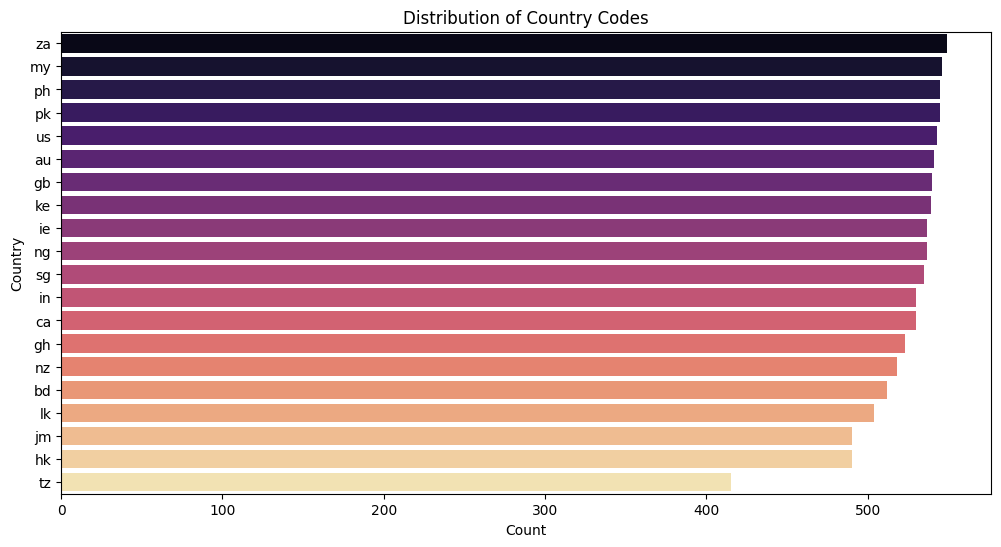


Average Label (PCL proportion) by Country:
   country     label
0       au  0.301294
1       bd  0.388672
2       ca  0.388679
3       gb  0.442593
4       gh  0.567878
5       hk  0.279592
6       ie  0.394786
7       in  0.296226
8       jm  0.473469
9       ke  0.378479
10      lk  0.402778
11      my  0.360806
12      ng  0.554935
13      nz  0.372587
14      ph  0.484404
15      pk  0.422018
16      sg  0.319626
17      tz  0.375904
18      us  0.348066
19      za  0.411658


C:\Users\emanu\AppData\Local\Temp\ipykernel_37192\3842959822.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='label', y='country', data=country_label, order=country_label.sort_values('label', ascending=False)['country'], palette="RdYlBu")


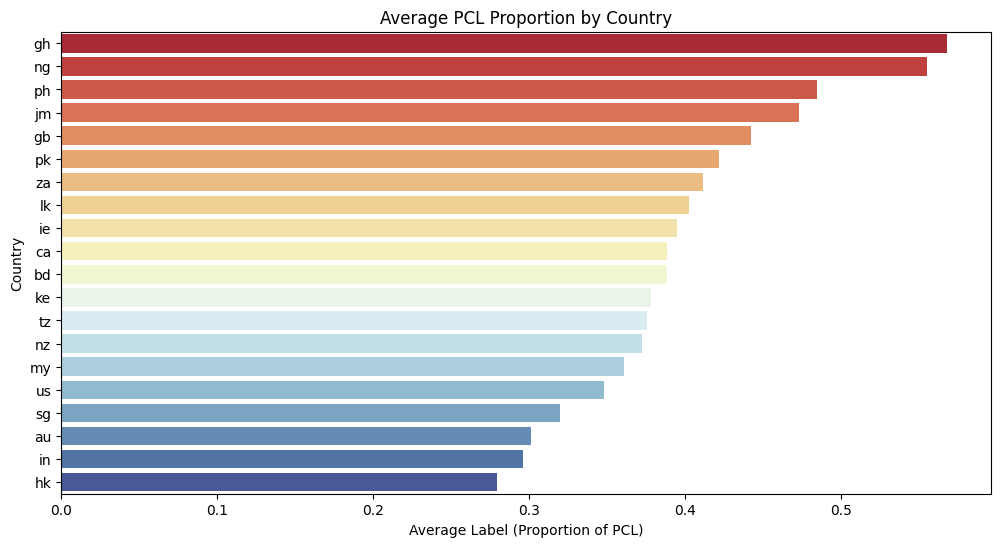

In [ ]:
#################################
#Analysis of Country Distribution
#################################
plt.figure(figsize=(12,6))
sns.countplot(y='country', data=df, order=df['country'].value_counts().index, palette="magma")
plt.title("Distribution of Country Codes")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

# Relationship between country and label (calculate average label per country)
country_label = df.groupby('country')['label'].mean().reset_index()
print("\nAverage Label (PCL proportion) by Country:")
print(country_label)

plt.figure(figsize=(12,6))
sns.barplot(x='label', y='country', data=country_label, order=country_label.sort_values('label', ascending=False)['country'], palette="RdYlBu")
plt.title("Average PCL Proportion by Country")
plt.xlabel("Average Label (Proportion of PCL)")
plt.ylabel("Country")
plt.show()

In [ ]:
#################################
#Frequent Word Analysis in PCL vs. non-PCL Texts
#################################
def get_top_n_words(corpus, n=None):
    # Use CountVectorizer to extract words (excluding English stop words)
    vec = CountVectorizer(stop_words='english')
    X = vec.fit_transform(corpus)
    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Top words in PCL texts
pcl_texts = df[df['label'] == 1]['text'].dropna().astype(str)
top_words_pcl = get_top_n_words(pcl_texts, n=20)
print("\nTop words in PCL texts:")
for word, freq in top_words_pcl:
    print(f"{word}: {freq}")

# Top words in non-PCL texts
non_pcl_texts = df[df['label'] == 0]['text'].dropna().astype(str)
top_words_non_pcl = get_top_n_words(non_pcl_texts, n=20)
print("\nTop words in non-PCL texts:")
for word, freq in top_words_non_pcl:
    print(f"{word}: {freq}")


Top words in PCL texts:
people: 258
said: 238
families: 197
poor: 177
women: 163
need: 155
homeless: 140
children: 128
disabled: 108
help: 95
government: 93
refugees: 92
vulnerable: 90
support: 70
food: 62
year: 61
country: 61
world: 59
hopeless: 57
like: 57

Top words in non-PCL texts:
said: 1730
women: 1409
people: 1335
immigrants: 1197
vulnerable: 1017
need: 951
disabled: 932
families: 932
refugees: 779
poor: 779
homeless: 718
children: 712
new: 698
government: 680
year: 628
country: 604
000: 588
immigrant: 510
refugee: 437
illegal: 435


In [24]:
#################################
# Check for Missing Values
#################################
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
id             0
unique_id      0
category       0
country        0
text           1
label          0
text_length    0
dtype: int64


In [26]:
missing_value_row = df[df.isnull().any(axis=1)]
print("\nRow with missing value:")
print(missing_value_row)


Row with missing value:
        id   unique_id category country text  label  text_length
8639  8640  @@16852855  migrant      ke  NaN      0            1


In [12]:
print("\nExamples of texts labeled as PCL (1):")
print(df[df['label'] == 1]['text'].sample(3, random_state=42).tolist())

print("\nExamples of texts labeled as non-PCL (0):")
print(df[df['label'] == 0]['text'].sample(3, random_state=42).tolist())



Examples of texts labeled as PCL (1):
["It 's just the start of what she hopes becomes a mountain of clothing she will give away to those in need as cold weather approaches .", 'The institute selects talented students from poor families and provides them free coaching , food and accommodation so that they focus only on cracking the IIT-JEE .', "What could drive an individual to take his or her own life ? What goes on in the mind of a suicidal person ? Fear , desperation , isolation , hopelessness , failure or what ? Suicide is a desperate attempt to escape unbearable suffering . Most suicidal people are deeply conflicted about ending their own lives . They wish there was an alternative to suicide , but they just ca n't see one ."]

Examples of texts labeled as non-PCL (0):
['No policy to rescue disabled during emergency : Abha Khetarpal', 'The aid will be targeted at the most vulnerable in storm-struck localities of the two neighbouring countries , the European Commission said in a st